In [1]:
import numpy as np
import qiskit
from qiskit_experiments.library import T2Ramsey

In [2]:
qubit = 0
# set the desired delays
delays = list(np.arange(1e-6, 50e-6, 2e-6))

In [3]:
# Create a T2Ramsey experiment. Print the first circuit as an example
exp1 = T2Ramsey((qubit,), delays, osc_freq=1e5)

print(exp1.circuits()[0])

     ┌────┐┌─────────────────┐┌─────────┐ ░ ┌────┐ ░ ┌─┐
  q: ┤ √X ├┤ Delay(1e-06[s]) ├┤ Rz(π/5) ├─░─┤ √X ├─░─┤M├
     └────┘└─────────────────┘└─────────┘ ░ └────┘ ░ └╥┘
c: 1/═════════════════════════════════════════════════╩═
                                                      0 


In [4]:
# A T1 simulator
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

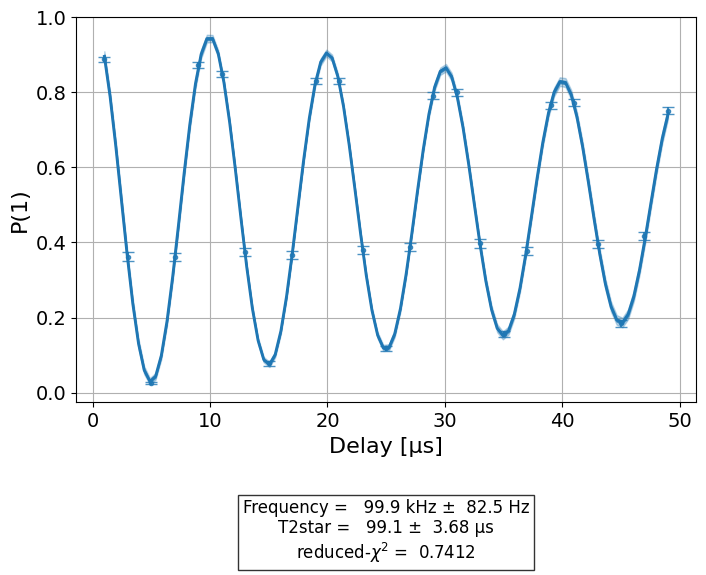

In [5]:
# Set scheduling method so circuit is scheduled for delay noise simulation
exp1.set_transpile_options(scheduling_method='asap')

# Run experiment
expdata1 = exp1.run(backend=backend, shots=2000, seed_simulator=101)
expdata1.block_for_results()  # Wait for job/analysis to finish.

# Display the figure
display(expdata1.figure(0))

In [6]:
# Print results
for result in expdata1.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T2RamseyAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_cos_decay(x) = amp * exp(-x / tau) * cos(2 * pi * freq * x + phi) + base
 - success: True
 - number of function evals: 240
 - degree of freedom: 20
 - chi-square: 14.824965888021474
 - reduced chi-square: 0.7412482944010736
 - Akaike info crit.: -3.0640795240921985
 - Bayesian info crit.: 3.0302996002488047
 - init params:
  * amp = 0.5
  * tau = 0.0001129974999259766
  * freq = 100000.0000000005
  * phi = -3.141592653589793
  * base = 0.4768115942028985
 - fit params:
  * amp = 0.4956820356502422 ± 0.003691893308491836
  * tau = 9.908182896691358e-05 ± 3.677086812337471e-06
  * freq = 99944.3418080032 ± 82.52542885764062
  * phi = 0.004894502848775017 ± 0.012532155556735527
  * base = 0.5003968349200204 ± 0.0017164115596582205
 - correlations:
  * (freq, phi) = -0.821936119183511
  * (amp, tau) = -0.7544001900685517
  * (freq, base) = -0.191839

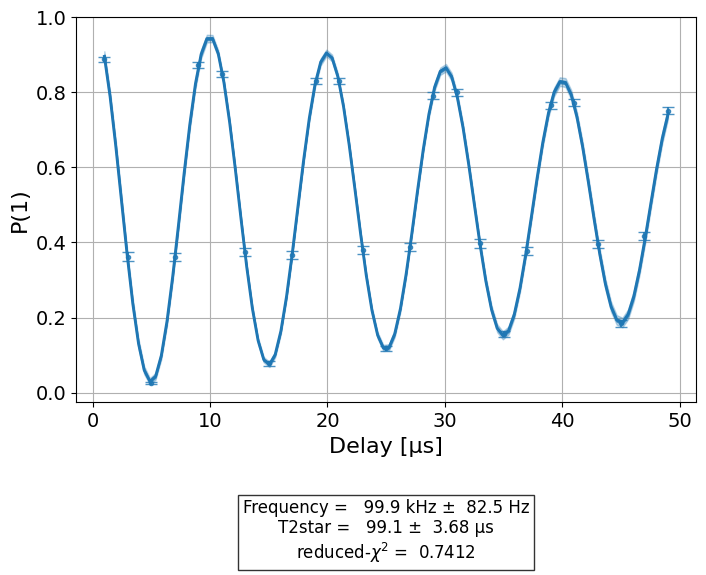

In [7]:
user_p0={
    "A": 0.5,
    "T2star": 20e-6,
    "f": 110000,
    "phi": 0,
    "B": 0.5
        }
exp_with_p0 = T2Ramsey((qubit,), delays, osc_freq=1e5)
exp_with_p0.analysis.set_options(p0=user_p0)
exp_with_p0.set_transpile_options(scheduling_method='asap')
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000, seed_simulator=101)
expdata_with_p0.block_for_results()

# Display fit figure
display(expdata_with_p0.figure(0))

In [8]:
# Print results
for result in expdata_with_p0.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T2RamseyAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_cos_decay(x) = amp * exp(-x / tau) * cos(2 * pi * freq * x + phi) + base
 - success: True
 - number of function evals: 68
 - degree of freedom: 20
 - chi-square: 14.824965888028036
 - reduced chi-square: 0.7412482944014018
 - Akaike info crit.: -3.064079524081132
 - Bayesian info crit.: 3.0302996002598714
 - init params:
  * amp = 0.5
  * tau = 0.0001129974999259766
  * freq = 80000.0000000005
  * phi = 0.0
  * base = 0.4768115942028985
 - fit params:
  * amp = 0.4956820342849599 ± 0.003691893297107687
  * tau = 9.908183116194963e-05 ± 3.6770869619642796e-06
  * freq = 99944.3417428096 ± 82.52542803176071
  * phi = 0.004894510505757407 ± 0.012532155443300818
  * base = 0.5003968350405797 ± 0.0017164115587584108
 - correlations:
  * (freq, phi) = -0.8219361174778498
  * (amp, tau) = -0.7544001900605569
  * (freq, base) = -0.19183983490901393
  * 